In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

2.1.0


## Files inlezen

In [2]:
columns = ["Time","acc_x", "acc_y", "acc_z","gyro_x", "gyro_y", "gyro_z", "activity"]
smash = pd.read_csv("Slagen/Smash/6011853_0000000000_25Hz.csv", names=columns, sep=',')
smash.head()

,Time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,activity
0,2020-02-28 13:50:59.000,0.016602,-0.032715,-0.014160,12.145995,78.247070,-93.566887,NaN
1,2020-02-28 13:50:59.040,0.026367,-0.036621,0.002930,12.573241,77.087402,-93.688957,NaN
2,2020-02-28 13:50:59.080,0.017578,-0.029785,0.008789,10.437011,79.406738,-92.163078,NaN
3,2020-02-28 13:50:59.119,-0.017578,-0.020508,0.116211,12.023925,78.125000,-93.017570,NaN
4,2020-02-28 13:50:59.159,-0.034180,-0.013184,0.119141,9.704590,74.218750,-90.820305,NaN


In [3]:
columns = ["Time","acc_x", "acc_y", "acc_z","gyro_x", "gyro_y", "gyro_z", "activity"]
lob = pd.read_csv("Slagen/Lob/6011853_0000000000_25Hz.csv", names=columns, sep=',')
lob.head()

,Time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,activity
0,2020-02-28 14:09:36.000,-0.529297,0.480957,-1.020996,6.652832,-106.994621,51.330563,NaN
1,2020-02-28 14:09:36.040,-0.467285,0.477051,-0.987305,15.563964,-102.172844,109.863274,NaN
2,2020-02-28 14:09:36.080,-0.314453,0.527832,-0.958008,28.198240,-85.754387,95.092766,NaN
3,2020-02-28 14:09:36.119,-0.345703,0.550781,-0.901855,46.874996,-64.025879,108.093254,NaN
4,2020-02-28 14:09:36.159,-0.176758,0.745117,-0.863770,58.227535,-32.714844,134.094238,NaN


In [4]:
columns = ["Time","acc_x", "acc_y", "acc_z","gyro_x", "gyro_y", "gyro_z", "activity"]
clear = pd.read_csv("Slagen/Clear/6011853_0000000000_25Hz.csv", names=columns, sep=',')
clear.head()

,Time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,activity
0,2020-02-28 13:44:21.000,0.007324,-0.000977,0.011230,9.826660,76.538086,-88.562004,NaN
1,2020-02-28 13:44:21.040,0.019043,-0.008301,0.003418,9.826660,78.308105,-89.599602,NaN
2,2020-02-28 13:44:21.079,0.022949,-0.021973,-0.014648,8.300781,76.782227,-88.439934,NaN
3,2020-02-28 13:44:21.119,0.012207,-0.019531,-0.022461,11.291503,80.383293,-86.975090,NaN
4,2020-02-28 13:44:21.159,-0.011719,0.003906,0.009766,12.939452,81.542961,-88.317863,NaN


In [5]:
columns = ["Time","acc_x", "acc_y", "acc_z","gyro_x", "gyro_y", "gyro_z", "activity"]
dab = pd.read_csv("Slagen/Dab/6011853_0000000000_25Hz.csv", names=columns, sep=',')
dab.head()

,Time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,activity
0,2020-02-28 14:06:02.002,0.032227,0.707520,-0.857910,-14.404296,-3.967285,-17.517090,NaN
1,2020-02-28 14:06:02.042,-0.047363,0.657227,-0.893555,68.237305,0.122070,-45.104977,NaN
2,2020-02-28 14:06:02.082,-0.084473,0.687012,-0.918457,85.754387,-3.601074,-13.488769,NaN
3,2020-02-28 14:06:02.122,-0.019531,0.593262,-0.818359,73.303223,-6.591796,-20.141600,NaN
4,2020-02-28 14:06:02.162,0.026855,0.577148,-0.777344,36.315918,0.793457,6.713867,NaN


In [6]:
columns = ["Time","acc_x", "acc_y", "acc_z","gyro_x", "gyro_y", "gyro_z", "activity"]
drive = pd.read_csv("Slagen/Drive/6011853_0000000000_25Hz.csv", names=columns, sep=',')
drive.head()

,Time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,activity
0,2020-02-28 13:56:13.000,-1.438965,4.177246,-8.287598,-1999.938843,-671.874939,499.938934,NaN
1,2020-02-28 13:56:13.039,-3.118652,-3.612305,-6.059082,-1359.741089,827.392517,354.125946,NaN
2,2020-02-28 13:56:13.079,-1.413574,-2.388184,0.218262,-209.350571,232.421860,95.642082,NaN
3,2020-02-28 13:56:13.119,-1.266602,0.960449,1.499023,447.631805,-202.209457,-189.025864,NaN
4,2020-02-28 13:56:13.159,0.508301,2.041992,0.338867,476.379364,12.634276,-36.560059,NaN


In [7]:
columns = ["Time","acc_x", "acc_y", "acc_z","gyro_x", "gyro_y", "gyro_z", "activity"]
ks = pd.read_csv("Slagen/Korte Service/6011853_0000000000_25Hz.csv", names=columns, sep=',')
ks.head()

,Time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,activity
0,2020-02-28 14:01:10.000,-0.878418,1.281250,0.145020,-179.077133,-69.580078,41.015621,NaN
1,2020-02-28 14:01:10.039,-0.148438,1.527832,0.835449,-104.553215,-23.925779,101.257317,NaN
2,2020-02-28 14:01:10.079,-1.562500,-0.939453,-0.297852,310.302734,9.155273,499.816864,NaN
3,2020-02-28 14:01:10.119,-1.594727,-2.951660,-3.930664,1066.833496,-78.796387,-343.994110,NaN
4,2020-02-28 14:01:10.159,-1.501953,4.409180,-1.812500,887.878357,147.399902,-157.104492,NaN


In [9]:
columns = ["Time","acc_x", "acc_y", "acc_z","gyro_x", "gyro_y", "gyro_z", "activity"]
netdrop = pd.read_csv("Slagen/Netdrop/6011853_0000000000_25Hz.csv", names=columns, sep=',')
netdrop.head()

,Time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,activity
0,2020-02-28 14:15:46.000,-0.526367,0.927734,-0.232422,-13.916015,17.272949,-31.188963,NaN
1,2020-02-28 14:15:46.040,-0.553223,0.841309,-0.222656,-24.047850,15.624999,52.185055,NaN
2,2020-02-28 14:15:46.080,-0.609375,0.743164,-0.186035,-10.742187,2.136230,-36.804199,NaN
3,2020-02-28 14:15:46.119,-0.446289,0.832031,-0.168945,-11.108397,-1.831055,17.700195,NaN
4,2020-02-28 14:15:46.159,-0.548340,0.723145,-0.123535,-7.019042,-2.807617,-12.145995,NaN


## Thresholding - Labeling

In [11]:
smash['activity'] = "smash"
lob['activity'] = "lob"
clear['activity'] = "clear"
dab['activity'] = "dab"
drive['activity'] = "drive"
ks['activity'] = "ks"
netdrop['activity'] = "netdrop"

In [12]:
smash = smash.drop(['Time'], axis = 1).copy()
lob = lob.drop(['Time'], axis = 1).copy()
clear = clear.drop(['Time'], axis = 1).copy()
dab = dab.drop(['Time'], axis = 1).copy()
drive = drive.drop(['Time'], axis = 1).copy()
ks = ks.drop(['Time'], axis = 1).copy()
netdrop = netdrop.drop(['Time'], axis = 1).copy()

## Combineren dataframes

In [13]:
smash = smash.append(lob)
smash = smash.append(clear)
smash = smash.append(dab)
smash = smash.append(drive)
smash = smash.append(ks)
smash = smash.append(netdrop)

## Data balancing

In [14]:
smash['activity'].value_counts()

smash      2602
clear      2477
drive      1651
lob        1601
ks         1176
netdrop    1151
dab        1126
Name: activity, dtype: int64

In [15]:
Smash = smash[smash['activity']=='smash'].head(1126).copy()
Lob = smash[smash['activity']=='lob'].head(1126).copy()
Clear = smash[smash['activity']=='clear'].head(1126).copy()
Drive = smash[smash['activity']=='drive'].head(1126).copy()
Ks = smash[smash['activity']=='ks'].head(1126).copy()
Netdrop = smash[smash['activity']=='netdrop'].head(1126).copy()
Dab = smash[smash['activity']=='dab'].head(1126).copy()

In [16]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Smash, Lob,Clear,Drive, Ks,Netdrop,Dab])
balanced_data.shape

(7882, 7)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,activity,label
0,0.016602,-0.032715,-0.014160,12.145995,78.247070,-93.566887,smash,6
1,0.026367,-0.036621,0.002930,12.573241,77.087402,-93.688957,smash,6
2,0.017578,-0.029785,0.008789,10.437011,79.406738,-92.163078,smash,6
3,-0.017578,-0.020508,0.116211,12.023925,78.125000,-93.017570,smash,6
4,-0.034180,-0.013184,0.119141,9.704590,74.218750,-90.820305,smash,6


In [19]:
label.inverse_transform([0,1,2,3,4,5,6])

array(['clear', 'dab', 'drive', 'ks', 'lob', 'netdrop', 'smash'],
      dtype=object)

In [20]:
X = balanced_data[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z' ]]
y = balanced_data['label']

## Schaling

In [21]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(data = X, columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
scaled_X['label'] = y.values
scaled_X['acc_x'] *=125
scaled_X['acc_y'] *=125
scaled_X['acc_z'] *=125

## Normalisatie per sample

In [22]:
scaled_X.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,2.075250,-4.089375,-1.770000,12.145995,78.247070,-93.566887,6
1,3.295875,-4.577625,0.366250,12.573241,77.087402,-93.688957,6
2,2.197250,-3.723125,1.098625,10.437011,79.406738,-92.163078,6
3,-2.197250,-2.563500,14.526375,12.023925,78.125000,-93.017570,6
4,-4.272500,-1.648000,14.892625,9.704590,74.218750,-90.820305,6


In [23]:
Xnorm = pd.DataFrame(data = scaled_X, columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
ynorm = scaled_X['label']
Xnorm = normalize(Xnorm)
Xnorm = df = pd.DataFrame(Xnorm, columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
Xnorm['label'] = ynorm.values
Xnorm.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,0.016917,-0.033335,-0.014428,0.099010,0.637843,-0.762724,6
1,0.026992,-0.037489,0.002999,0.102969,0.631310,-0.767269,6
2,0.017984,-0.030472,0.008992,0.085422,0.649909,-0.754314,6
3,-0.017867,-0.020846,0.118125,0.097776,0.635293,-0.756396,6
4,-0.035989,-0.013882,0.125447,0.081746,0.625175,-0.765016,6


## Indelen data in frames

In [24]:
import scipy.stats as stats

In [25]:
Fs = 4
frame_size = Fs*4 # 80
hop_size = 1      #Fs*2 # 40

In [26]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 6

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['acc_x'].values[i: i + frame_size]
        y = df['acc_y'].values[i: i + frame_size]
        z = df['acc_z'].values[i: i + frame_size]
        gx = df['gyro_x'].values[i: i + frame_size]
        gy = df['gyro_y'].values[i: i + frame_size]
        gz = df['gyro_z'].values[i: i + frame_size]
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z,gx,gy,gz])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [27]:
X, y = get_frames(Xnorm, frame_size, hop_size)

In [28]:
X.shape, y.shape

((7866, 16, 6), (7866,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [31]:
X_train.shape, X_test.shape

((6292, 16, 6), (1574, 16, 6))

In [32]:
X_train[0].shape, X_test[0].shape

((16, 6), (16, 6))

In [33]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [34]:
X_train[0].shape, X_test[0].shape

((16, 6, 1), (16, 6, 1))

## 2D CNN Model

In [35]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [36]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 4, 16)         160       
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 4, 16)         64        
_________________________________________________________________
dropout (Dropout)            (None, 14, 4, 16)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 2, 32)         4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 2, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

In [38]:
epo = 150
history = model.fit(X_train, y_train, epochs = epo, batch_size=64, validation_data= (X_test, y_test), verbose=1, shuffle=True) 

Train on 6292 samples, validate on 1574 samples
Epoch 1/150
6292/6292 [==============================] - 3s 487us/sample - loss: 1.0181 - accuracy: 0.6146 - val_loss: 1.2508 - val_accuracy: 0.8310
Epoch 2/150
6292/6292 [==============================] - 1s 194us/sample - loss: 0.3647 - accuracy: 0.8584 - val_loss: 0.6705 - val_accuracy: 0.9250
Epoch 3/150
6292/6292 [==============================] - 1s 154us/sample - loss: 0.2497 - accuracy: 0.9069 - val_loss: 0.2707 - val_accuracy: 0.9555
Epoch 4/150
6292/6292 [==============================] - 1s 141us/sample - loss: 0.2079 - accuracy: 0.9191 - val_loss: 0.1463 - val_accuracy: 0.9460
Epoch 5/150
6292/6292 [==============================] - 1s 143us/sample - loss: 0.1841 - accuracy: 0.9288 - val_loss: 0.1041 - val_accuracy: 0.9689
Epoch 6/150
6292/6292 [==============================] - 1s 140us/sample - loss: 0.1536 - accuracy: 0.9363 - val_loss: 0.0908 - val_accuracy: 0.9695
Epoch 7/150
6292/6292 [==============================] - 1

6292/6292 [==============================] - 1s 143us/sample - loss: 0.0391 - accuracy: 0.9862 - val_loss: 0.0186 - val_accuracy: 0.9936
Epoch 56/150
6292/6292 [==============================] - 1s 140us/sample - loss: 0.0430 - accuracy: 0.9836 - val_loss: 0.0216 - val_accuracy: 0.9930
Epoch 57/150
6292/6292 [==============================] - 1s 181us/sample - loss: 0.0434 - accuracy: 0.9844 - val_loss: 0.0194 - val_accuracy: 0.9943oss: 0.0474 - 
Epoch 58/150
6292/6292 [==============================] - 1s 191us/sample - loss: 0.0419 - accuracy: 0.9838 - val_loss: 0.0159 - val_accuracy: 0.9956
Epoch 59/150
6292/6292 [==============================] - 1s 171us/sample - loss: 0.0365 - accuracy: 0.9843 - val_loss: 0.0156 - val_accuracy: 0.9943
Epoch 60/150
6292/6292 [==============================] - 1s 179us/sample - loss: 0.0442 - accuracy: 0.9822 - val_loss: 0.0136 - val_accuracy: 0.9968
Epoch 61/150
6292/6292 [==============================] - 1s 237us/sample - loss: 0.0366 - accuracy

6292/6292 [==============================] - 1s 156us/sample - loss: 0.0278 - accuracy: 0.9900 - val_loss: 0.0173 - val_accuracy: 0.9936
Epoch 110/150
6292/6292 [==============================] - 1s 158us/sample - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.0102 - val_accuracy: 0.9968
Epoch 111/150
6292/6292 [==============================] - 1s 158us/sample - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0090 - val_accuracy: 0.9962
Epoch 112/150
6292/6292 [==============================] - 1s 159us/sample - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0180 - val_accuracy: 0.9924
Epoch 113/150
6292/6292 [==============================] - 1s 210us/sample - loss: 0.0274 - accuracy: 0.9894 - val_loss: 0.0159 - val_accuracy: 0.9930
Epoch 114/150
6292/6292 [==============================] - 1s 212us/sample - loss: 0.0211 - accuracy: 0.9905 - val_loss: 0.0170 - val_accuracy: 0.9936
Epoch 115/150
6292/6292 [==============================] - 1s 222us/sample - loss: 0.0217 - accuracy: 0.9928

In [39]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

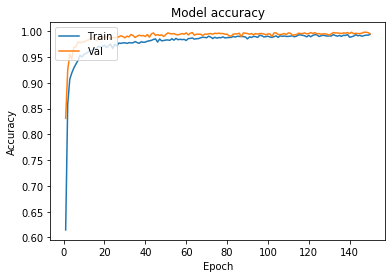

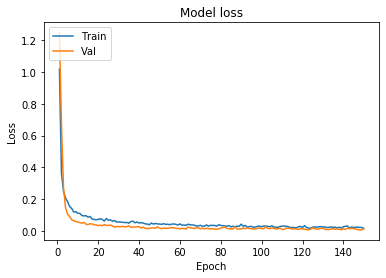

In [40]:
plot_learningCurve(history, epo)

In [41]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [42]:
y_pred = model.predict_classes(X_test)

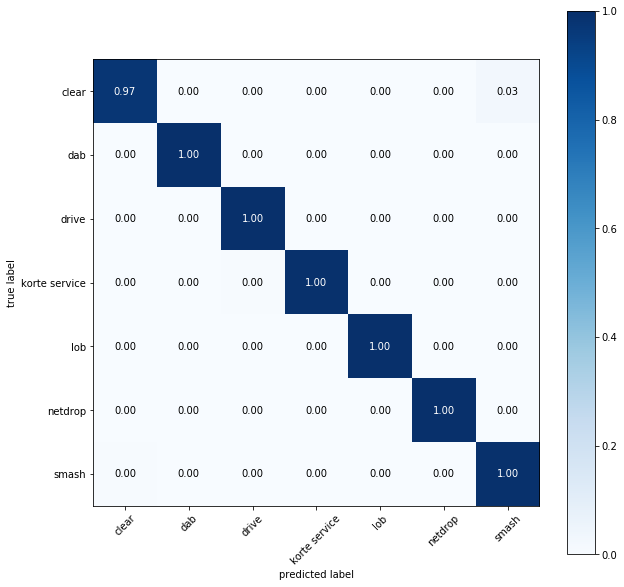

<Figure size 720x720 with 0 Axes>

In [43]:
from mlxtend.plotting import plot_confusion_matrix
matplotlib.rcParams['figure.figsize'] = [10, 10]

mat = confusion_matrix(y_test, y_pred)
class_names = ['clear', 'dab', 'drive','korte service', 'lob',  'netdrop','smash',]

fig, ax = plot_confusion_matrix(conf_mat=mat,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names,
                                cmap='Blues')
plt.figure(figsize=(10,10))
plt.show()

https://github.com/laxmimerit/Human-Activity-Recognition-Using-Accelerometer-Data-and-CNN/blob/master/Human%20Activity%20Recognition.ipynb

## Nieuwe data voorspellen

In [81]:
columns2 = ["Time","acc_x", "acc_y", "acc_z","gyro_x", "gyro_y", "gyro_z", "label"]
ksTest = pd.read_csv("Slagen/Netdrop/Test/6011853_0000000000_25Hz.csv", names=columns2, sep=',')
ksTest['label']= 5
ksTest = ksTest.drop(['Time'], axis = 1).copy()
ksTest.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,-0.071777,0.680176,-0.341797,-313.781738,-51.818844,111.816399,5
1,-0.556641,-0.090820,-0.410156,-310.180664,69.763184,148.803711,5
2,-0.732422,0.270996,-0.428223,-200.622543,83.679192,-10.620116,5
3,-0.750488,0.377441,-0.253906,-112.609856,38.085938,38.330078,5
4,-0.698242,0.671875,-0.150879,-39.184570,-16.113281,-29.479979,5


In [82]:
X2 = ksTest[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']]
y2 = ksTest['label']

In [83]:
scaled_X = pd.DataFrame(data = X2, columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
scaled_X['label'] = y2.values
scaled_X['acc_x'] *=125
scaled_X['acc_y'] *=125
scaled_X['acc_z'] *=125

In [84]:
Xnorm = pd.DataFrame(data = scaled_X, columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
ynorm = scaled_X['label']
Xnorm = normalize(Xnorm)
Xnorm = df = pd.DataFrame(Xnorm, columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
Xnorm['label'] = ynorm.values

In [85]:
X_2, y_2 = get_frames(Xnorm, frame_size, hop_size)

In [86]:
X_2 = X_2.reshape( X_2.shape[0], X_2.shape[1], X_2.shape[2], 1)

In [88]:
y2[0:10]

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
8    5
9    5
Name: label, dtype: int64

In [98]:
y_pred2 = model.predict_classes(X_2)
y_pred2[0:1000]
counts = np.bincount(y_pred2)
counts

array([  0,   0,   0, 232,   0, 695,   8], dtype=int64)

In [54]:
#probabilities = model.predict_proba(X_2)
#probabilities[0:10]

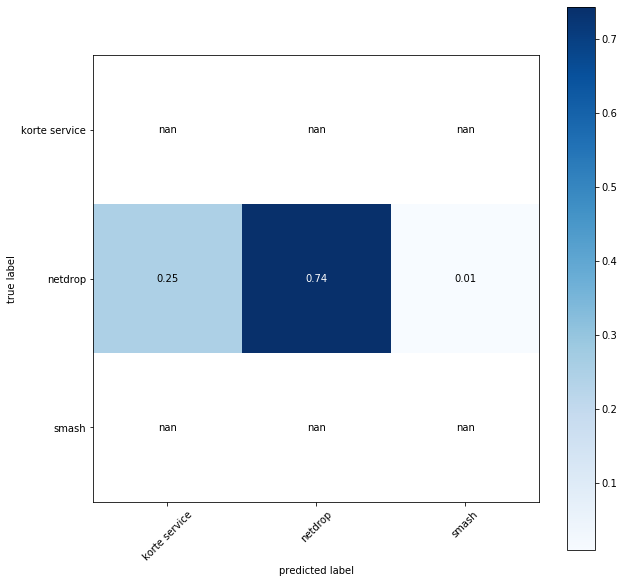

<Figure size 720x720 with 0 Axes>

In [99]:
mat2 = confusion_matrix(y_2, y_pred2)
class_names = ['korte service','netdrop','smash',]

fig, ax = plot_confusion_matrix(conf_mat=mat2,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names,
                                cmap='Blues')
plt.figure(figsize=(10,10))
plt.show()